In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
import seaborn as sns
sns.set_style('whitegrid')
from keras.models import  Sequential,load_model
from keras.layers import LSTM,Dense,Dropout

In [2]:
import os
data = pd.read_csv('gold-daily-price.csv')
data

,Date,Price,Open,High,Low,Volume,Chg%
0,03/01/1975,174.70,173.0,175.5,170.50,0,-0.23%
1,06/01/1975,174.40,172.0,174.5,167.50,0,-0.17%
2,07/01/1975,173.40,171.0,174.0,168.50,0,-0.57%
3,08/01/1975,177.40,176.0,180.0,176.00,0,2.31%
4,09/01/1975,178.30,179.0,179.1,177.00,0,0.51%
...,...,...,...,...,...,...,...
12262,11/05/2023,2020.50,2036.8,2047.6,2016.70,296.98K,-0.81%
12263,12/05/2023,2019.80,2020.5,2027.8,2005.70,220.50K,-0.03%
12264,15/05/2023,2022.70,2013.4,2027.5,2011.20,163.25K,0.14%
12265,16/05/2023,1993.00,2021.3,2022.7,1989.10,229.94K,-1.47%


In [3]:
df = data[['Date','Open']]
df

,Date,Open
0,03/01/1975,173.0
1,06/01/1975,172.0
2,07/01/1975,171.0
3,08/01/1975,176.0
4,09/01/1975,179.0
...,...,...
12262,11/05/2023,2036.8
12263,12/05/2023,2020.5
12264,15/05/2023,2013.4
12265,16/05/2023,2021.3


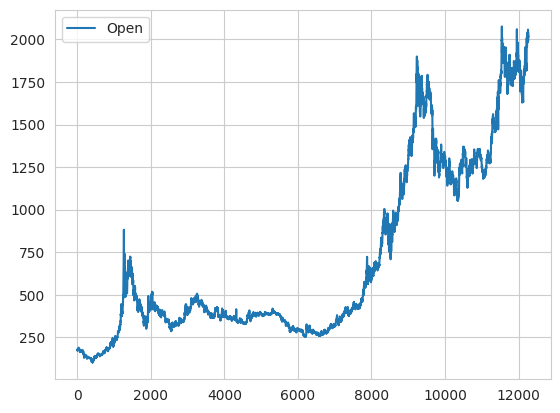

In [4]:
df.plot()
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12267 entries, 0 to 12266
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    12267 non-null  object 
 1   Open    12267 non-null  float64
dtypes: float64(1), object(1)
memory usage: 191.8+ KB


In [6]:
df.columns = ['ds','y']
df

,ds,y
0,03/01/1975,173.0
1,06/01/1975,172.0
2,07/01/1975,171.0
3,08/01/1975,176.0
4,09/01/1975,179.0
...,...,...
12262,11/05/2023,2036.8
12263,12/05/2023,2020.5
12264,15/05/2023,2013.4
12265,16/05/2023,2021.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12267 entries, 0 to 12266
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      12267 non-null  object 
 1   y       12267 non-null  float64
dtypes: float64(1), object(1)
memory usage: 191.8+ KB


In [8]:
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12267 entries, 0 to 12266
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      12267 non-null  datetime64[ns]
 1   y       12267 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 191.8 KB


<ipython-input-8-bfdc2c7f0476>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ds'] = pd.to_datetime(df['ds'])
<ipython-input-8-bfdc2c7f0476>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


In [9]:
df

,ds,y
0,1975-03-01,173.0
1,1975-06-01,172.0
2,1975-07-01,171.0
3,1975-08-01,176.0
4,1975-09-01,179.0
...,...,...
12262,2023-11-05,2036.8
12263,2023-12-05,2020.5
12264,2023-05-15,2013.4
12265,2023-05-16,2021.3


In [10]:
#Facebook Prophet library for timeseries data analyzer
from prophet import Prophet

# Initialize the Model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxusml5yl/82ty4rkk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxusml5yl/jzo_umo1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63717', 'data', 'file=/tmp/tmpxusml5yl/82ty4rkk.json', 'init=/tmp/tmpxusml5yl/jzo_umo1.json', 'output', 'file=/tmp/tmpxusml5yl/prophet_modelq4ldkxqj/prophet_model-20230518204640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:46:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:46:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
# Create future dates of 365 days
future_dates = model.make_future_dataframe(periods=2000)

In [12]:
future_dates
#2000 will be added to original data or dates

,ds
0,1975-01-04
1,1975-01-05
2,1975-01-07
3,1975-01-08
4,1975-01-10
...,...
14262,2029-05-23
14263,2029-05-24
14264,2029-05-25
14265,2029-05-26


In [13]:
prediction = model.predict(future_dates)

In [14]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1975-01-04,152.830723,57.510938,272.568966,152.830723,152.830723,12.405006,12.405006,12.405006,0.771308,0.771308,0.771308,11.633698,11.633698,11.633698,0.0,0.0,0.0,165.235728
1,1975-01-05,152.800155,54.239604,281.146914,152.800155,152.800155,13.586051,13.586051,13.586051,0.853522,0.853522,0.853522,12.732529,12.732529,12.732529,0.0,0.0,0.0,166.386206
2,1975-01-07,152.739019,58.108147,281.084579,152.739019,152.739019,14.633005,14.633005,14.633005,0.144493,0.144493,0.144493,14.488513,14.488513,14.488513,0.0,0.0,0.0,167.372024
3,1975-01-08,152.708451,51.538335,273.272500,152.708451,152.708451,13.320681,13.320681,13.320681,-1.810299,-1.810299,-1.810299,15.130980,15.130980,15.130980,0.0,0.0,0.0,166.029132
4,1975-01-10,152.647316,60.572850,278.583039,152.647316,152.647316,14.606432,14.606432,14.606432,-1.325945,-1.325945,-1.325945,15.932377,15.932377,15.932377,0.0,0.0,0.0,167.253748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14262,2029-05-23,2317.778092,1531.565825,2987.874419,1575.767249,2987.923797,-4.519533,-4.519533,-4.519533,-1.810299,-1.810299,-1.810299,-2.709234,-2.709234,-2.709234,0.0,0.0,0.0,2313.258558
14263,2029-05-24,2317.992801,1580.504634,2990.480423,1575.178892,2988.967338,-2.095793,-2.095793,-2.095793,0.609727,0.609727,0.609727,-2.705520,-2.705520,-2.705520,0.0,0.0,0.0,2315.897008
14264,2029-05-25,2318.207510,1567.493299,2998.306514,1574.590535,2990.010879,-4.058150,-4.058150,-4.058150,-1.325945,-1.325945,-1.325945,-2.732205,-2.732205,-2.732205,0.0,0.0,0.0,2314.149360
14265,2029-05-26,2318.422219,1557.846243,2976.800152,1574.002178,2991.054419,-2.023185,-2.023185,-2.023185,0.771308,0.771308,0.771308,-2.794493,-2.794493,-2.794493,0.0,0.0,0.0,2316.399033


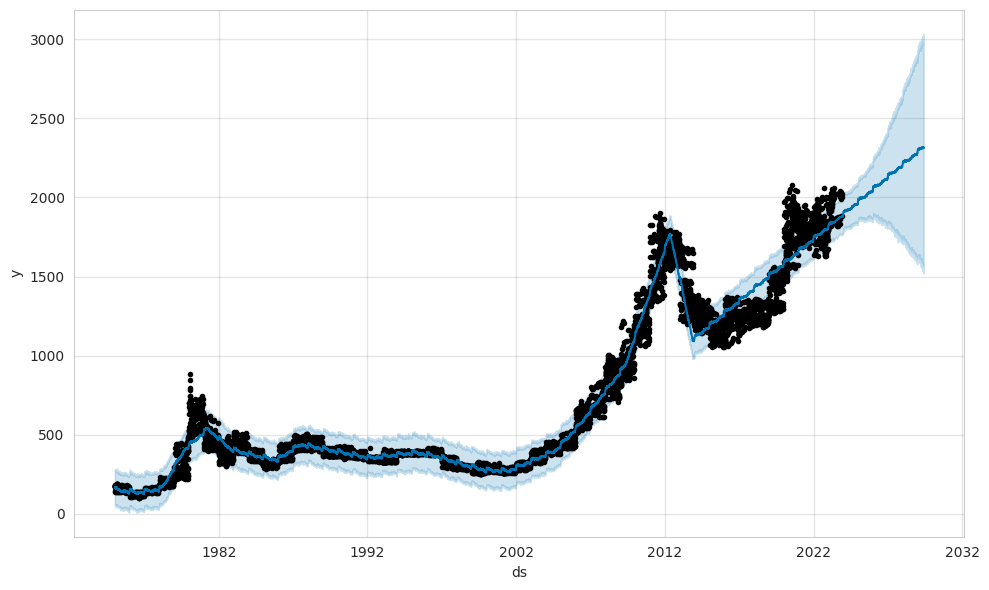

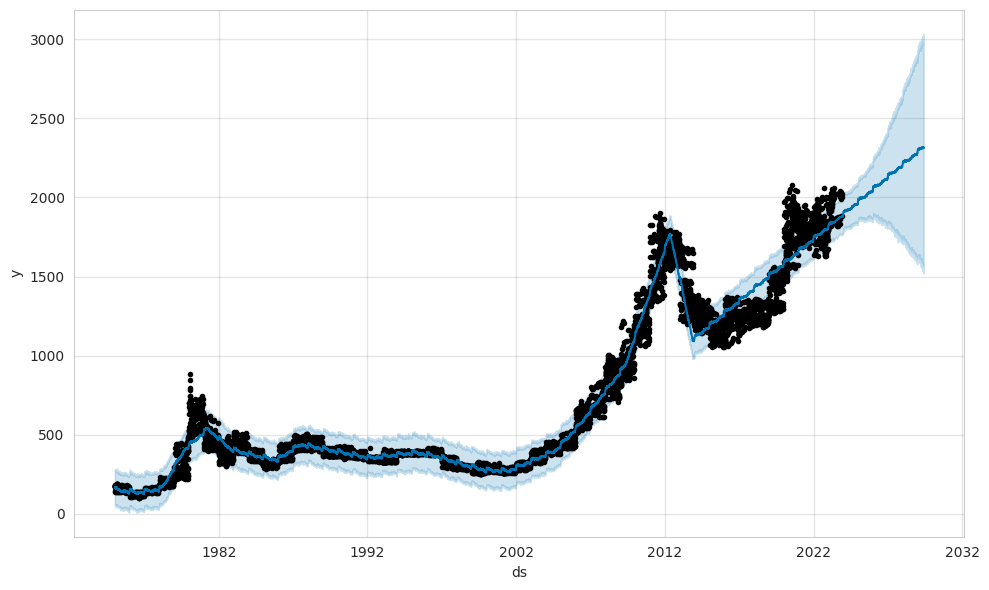

In [15]:
### plot the predicted projection
model.plot(prediction)